# Import data and get overview
Import of needed libraries, the raw data and getting an general overview for client:

Thomas Hansen, Buyer, 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?

In [121]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

%matplotlib inline

In [122]:
# importing raw data
df_raw = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [123]:
# general overview of the data
df_raw.head(3)

date     price    house_id  id        id.1  bedrooms  bathrooms  \
0  2014-10-13  221900.0  7129300520   1  7129300520       3.0       1.00   
1  2014-12-09  538000.0  6414100192   2  6414100192       3.0       2.25   
2  2015-02-25  180000.0  5631500400   3  5631500400       2.0       1.00   

   sqft_living  sqft_lot  floors  ...  grade  sqft_above  sqft_basement  \
0       1180.0    5650.0     1.0  ...      7      1180.0            0.0   
1       2570.0    7242.0     2.0  ...      7      2170.0          400.0   
2        770.0   10000.0     1.0  ...      6       770.0            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257         1340.0   
1      1951       19910.0    98125  47.7210 -122.319         1690.0   
2      1933           NaN    98028  47.7379 -122.233         2720.0   

   sqft_lot15  
0      5650.0  
1      7639.0  
2      8062.0  

[3 rows x 23 columns]

In [124]:
# overview of column types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [125]:
# eliminate not needed columns
df1 = df_raw.copy()
df1.drop(["id", "id.1"], inplace=True, axis=1)

In [126]:
# change "date" dtype to datetime with format %Y/%m/%d
df1['date'] = df1['date'].str.replace("-", "/")
df1['date'] = pd.to_datetime(df1['date'], format='%Y/%m/%d')
type(df1['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [127]:
# checking for duplicates
df1.duplicated().value_counts()

False    21597
Name: count, dtype: int64

Check different options for categorical values.

In [128]:
# check different options for column bedrooms
df1["bedrooms"].unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

In [129]:
# check different options for column bathrooms
df1["bathrooms"].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [130]:
# check different options for column floors
df1["floors"].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [131]:
# check different options for column waterfront
df1["waterfront"].unique()

array([nan,  0.,  1.])

In [132]:
# check different options for column view
df1["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [133]:
# check different options for column condition
df1["condition"].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [134]:
# check different options for column grade
df1["grade"].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [135]:
# divide column yr_renovated by 10
df1["yr_renovated"] = df1["yr_renovated"] / 10
df1["yr_renovated"].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

# Data cleaning
Dealing with missing data.

In [136]:
# display number of missing values per column 
df1.isna().sum()

date                0
price               0
house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

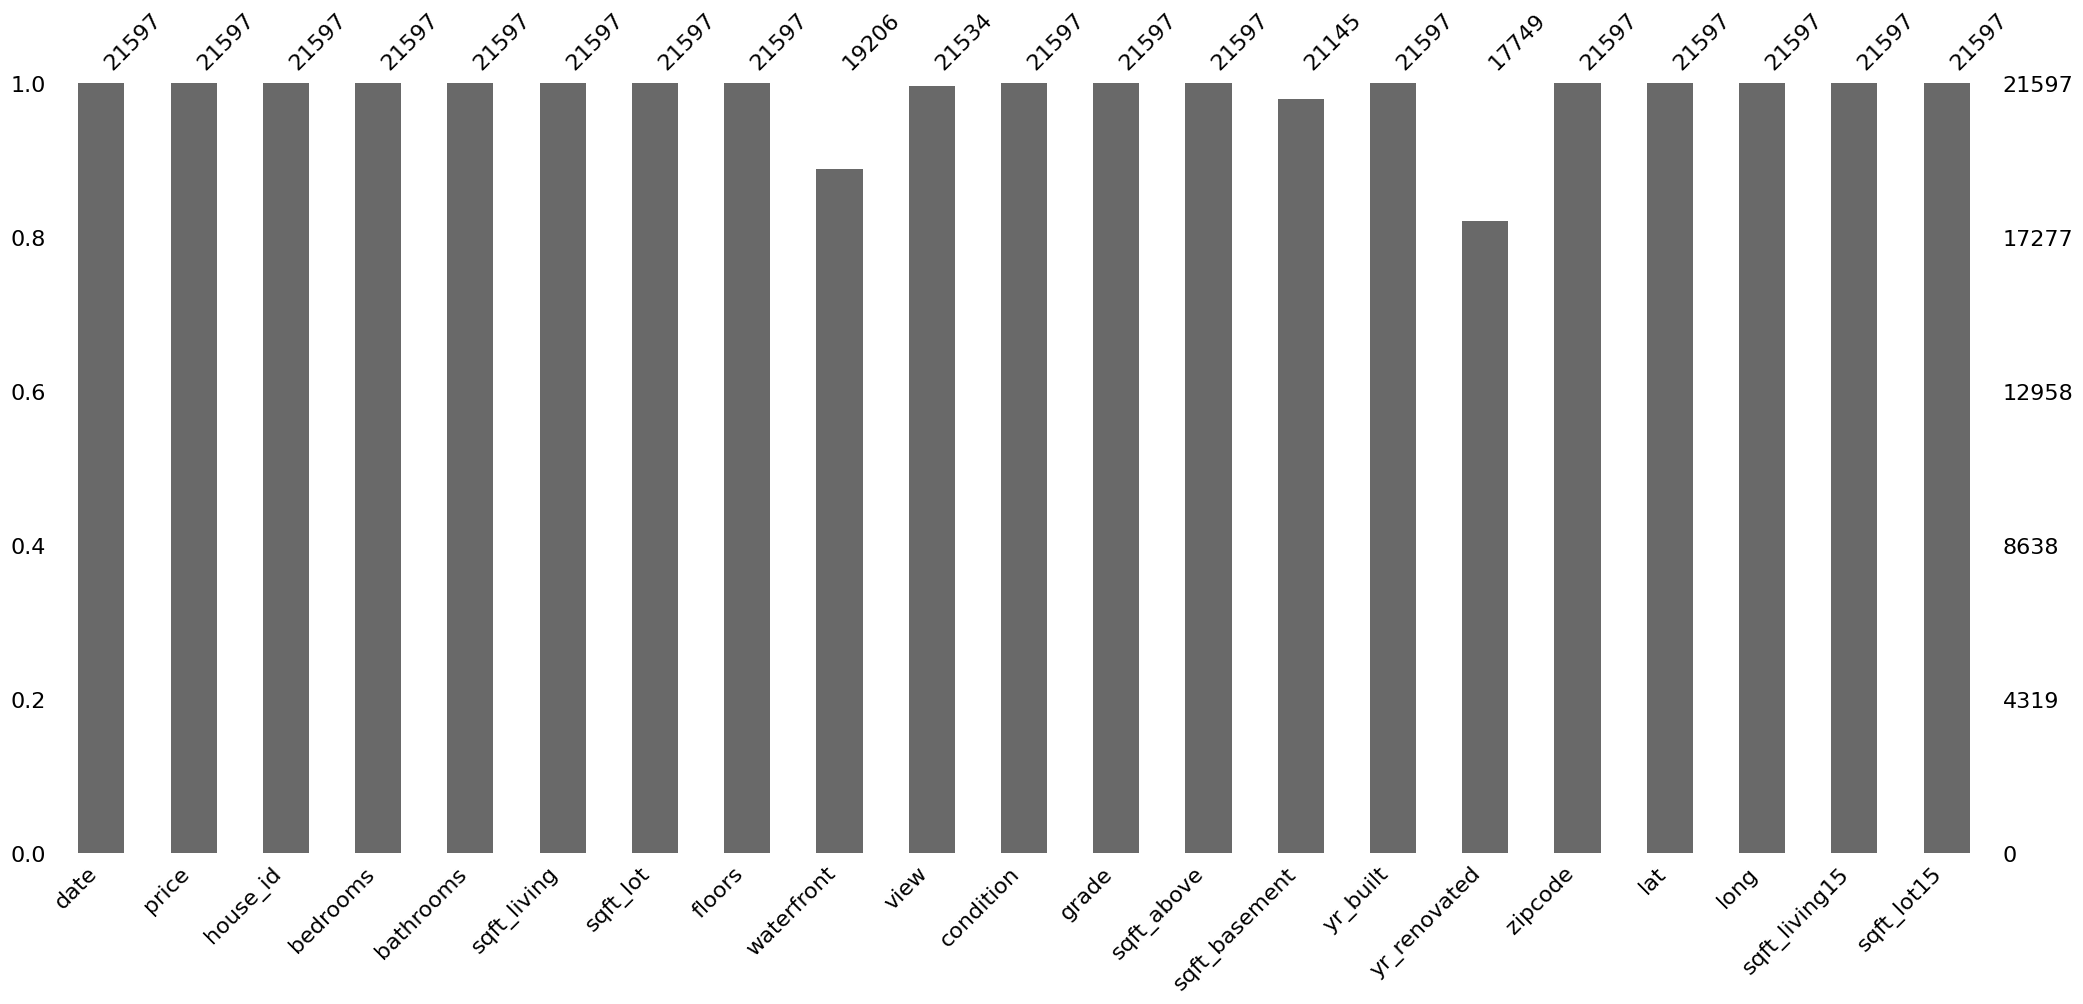

In [137]:
msno.bar(df1)

<Axes: >

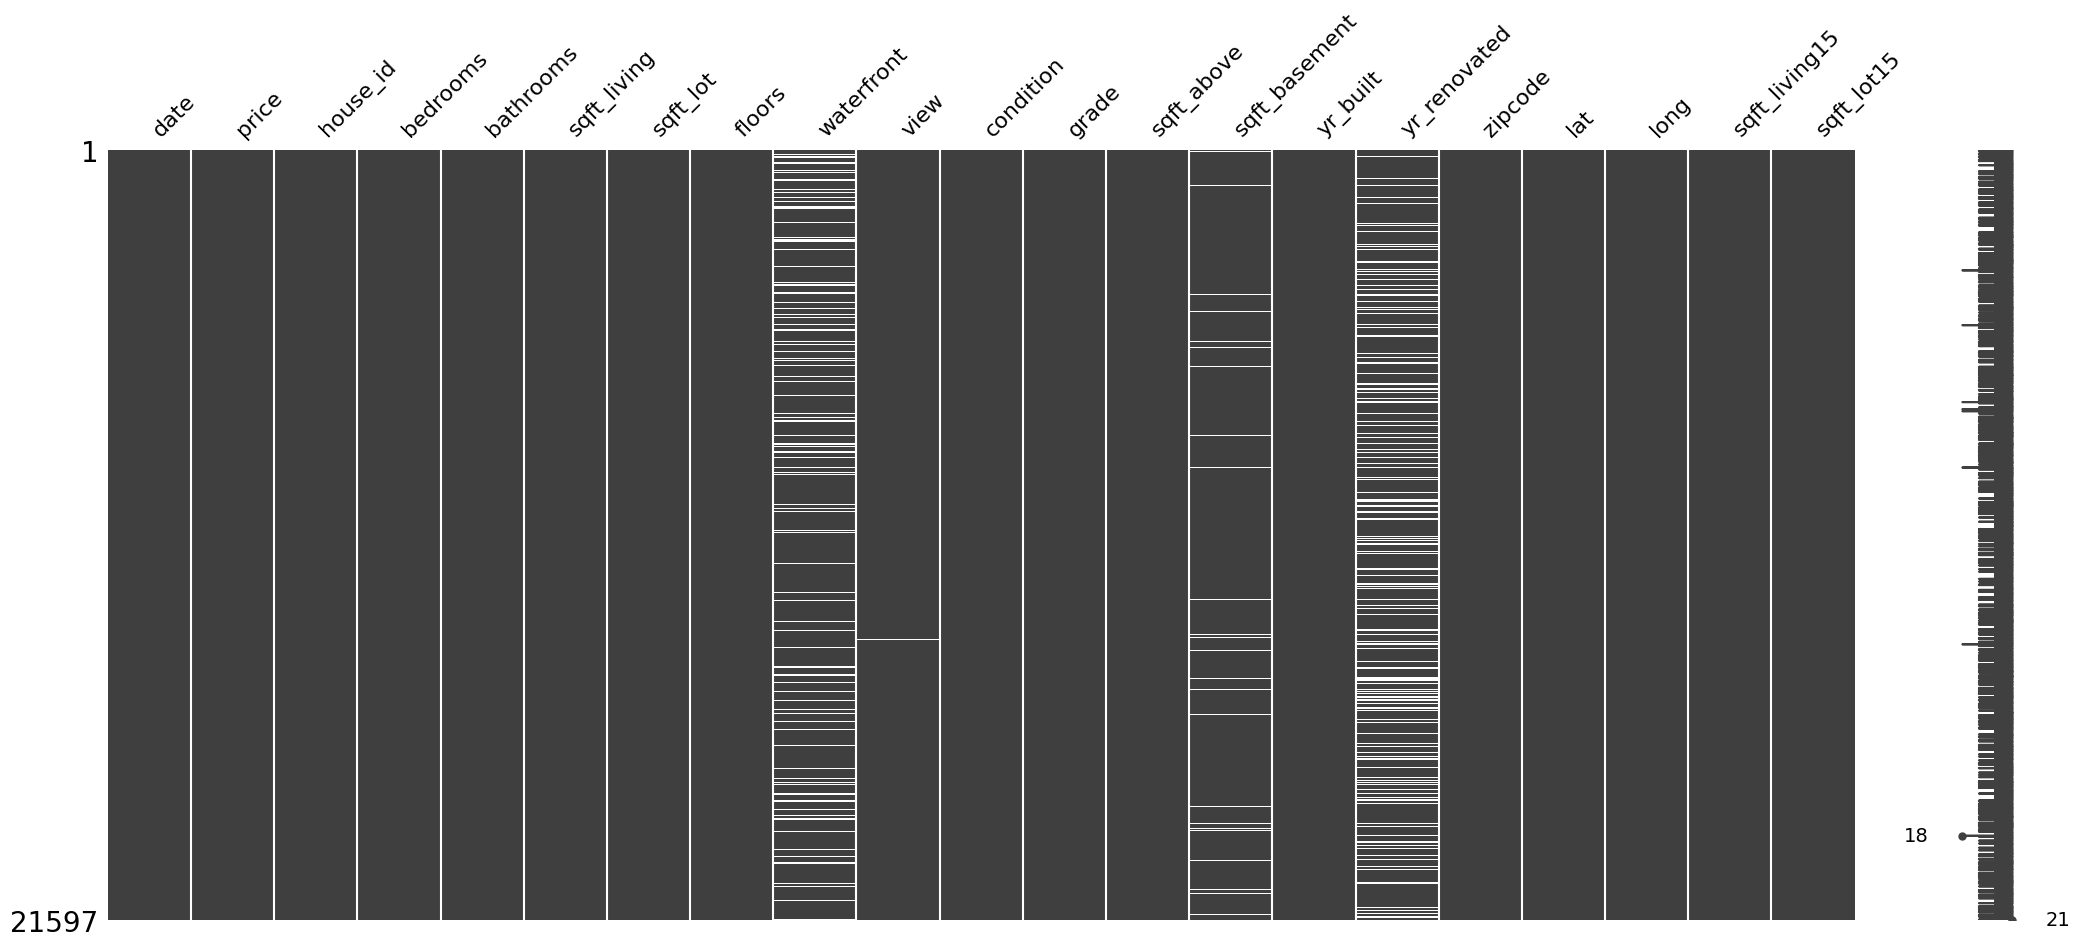

In [138]:
msno.matrix(df1)

In [139]:
print(f"numbers of rows : {df1.shape[0]}")
print(f"missing values in waterfront : {round(df1.waterfront.isna().sum()/df1.shape[0]*100,2)} %")
print(f"missing values in view : {round(df1.view.isna().sum()/df1.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(df1.sqft_basement.isna().sum()/df1.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df1.yr_renovated.isna().sum()/df1.shape[0]*100,2)} %")
print(f"missing values in data frame : {round(df1.isna().sum().sum()/(df1.shape[0]*df1.shape[1])*100,2)} %")

numbers of rows : 21597
missing values in waterfront : 11.07 %
missing values in view : 0.29 %
missing values in sqft_basement : 2.09 %
missing values in yr_renovated : 17.82 %
missing values in data frame : 1.49 %


Assumption: view and basement size have relativley small amount of missing values and are not relevant for client. Drop rows.

In [140]:
df1.dropna(subset = ['view', "sqft_basement"], inplace=True)

In [141]:
df1.isna().sum()

date                0
price               0
house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2348
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3749
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

General statistics of house price:
 count    2.108400e+04
mean     5.402749e+05
std      3.667199e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


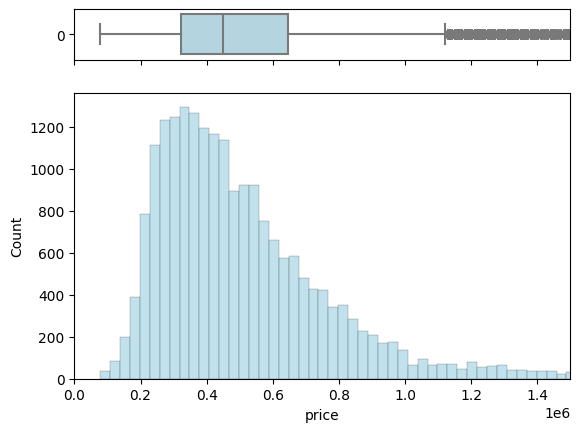

In [142]:
# overview of price distribution
print("General statistics of house price:\n", df1['price'].describe())

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df1["price"], orient="h", ax=ax_box, color='lightblue')
sns.histplot(data=df1, x="price", ax=ax_hist, binwidth=30000, color='lightblue')

 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_xlim([0, 1.5e6])
plt.show()

Examination of NaN entries for column "waterfront" more in detail.

In [143]:
print("General price statistics for houses with waterfront:\n", df1.query('waterfront == 1')["price"].describe(), "\n")

print("General price statistics for houses without waterfront:\n", df1.query('waterfront == 0')["price"].describe(), "\n")

print("General price statistics for NaN entries in column waterfront:\n", df1.loc[df1['waterfront'].isna()]["price"].describe(), "\n")

General price statistics for houses with waterfront:
 count    1.410000e+02
mean     1.705708e+06
std      1.122168e+06
min      2.850000e+05
25%      8.200000e+05
50%      1.580000e+06
75%      2.300000e+06
max      7.060000e+06
Name: price, dtype: float64 

General price statistics for houses without waterfront:
 count    1.859500e+04
mean     5.329667e+05
std      3.454155e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.390000e+05
max      7.700000e+06
Name: price, dtype: float64 

General price statistics for NaN entries in column waterfront:
 count    2.348000e+03
mean     5.281667e+05
std      3.248579e+05
min      8.000000e+04
25%      3.221750e+05
50%      4.450000e+05
75%      6.460000e+05
max      3.200000e+06
Name: price, dtype: float64 



Assumtion: general price statistics for houses without waterfront and NaN entries in this column are alike: fill NaN entries in column waterfront with 0.

In [144]:
# double check with location of house on map
df_test = df1.copy()
df_test = df_test.loc[df_test['waterfront'].isna()]

In [157]:
fig = px.scatter_mapbox(df_test, 
                        lat="lat", 
                        lon="long", 
                        hover_name="house_id", 
                        hover_data=["house_id", "price"],
                        color="price",
                        color_continuous_scale="rainbow",
                        range_color=[0,1.5e5],
                        size="sqft_living",
                        size_max=10,
                        zoom=9, 
                        height=800,
                        width=950)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [146]:
df1 = df1.fillna({'waterfront': 0})

In [147]:
df1.isna().sum()

date                0
price               0
house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3749
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Examination of NaN entries for column "yr_renovated" more in detail.

In [148]:
print("General price statistics for houses renovated:\n", df1.loc[df1['yr_renovated'] > 0]["price"].describe(), "\n")

print("General price statistics for houses not renovated:\n", df1.query('yr_renovated == 0')["price"].describe(), "\n")

print("General price statistics for NaN entries in column year renovated:\n", df1.loc[df1['yr_renovated'].isna()]["price"].describe(), "\n")

General price statistics for houses renovated:
 count    7.220000e+02
mean     7.671990e+05
std      6.261309e+05
min      1.100000e+05
25%      4.155000e+05
50%      6.075020e+05
75%      9.000000e+05
max      7.700000e+06
Name: price, dtype: float64 

General price statistics for houses not renovated:
 count    1.661300e+04
mean     5.310740e+05
std      3.498791e+05
min      8.000000e+04
25%      3.200000e+05
50%      4.474500e+05
75%      6.350000e+05
max      6.890000e+06
Name: price, dtype: float64 

General price statistics for NaN entries in column year renovated:
 count    3.749000e+03
mean     5.373446e+05
std      3.580425e+05
min      7.800000e+04
25%      3.224000e+05
50%      4.500000e+05
75%      6.410000e+05
max      5.570000e+06
Name: price, dtype: float64 



Assumtion: general price statistics for houses not renovated and NaN entries in this column are alike: fill NaN entries in column "yr_renovated" with 0. Also, column not relevant for client.

In [149]:
df1 = df1.fillna({'yr_renovated': 0})

In [150]:
df1.isna().sum()

date             0
price            0
house_id         0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Find relevant relationships
Data is cleaned and can be examined in detail.

In [151]:
df = df1.copy()

In [152]:
# get list of differnt types of dataframe
list(set(df.dtypes.tolist()))

[dtype('<M8[ns]'), dtype('float64'), dtype('int64')]

In [153]:
# only select numerical data
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [154]:
# find strongly related values with price
df_num_corr = df_num.corr()['price']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with price:\n{}".format(len(golden_features_list), golden_features_list))

There are 6 strongly correlated values with price:
price            1.000000
sqft_living      0.701899
grade            0.668031
sqft_above       0.605388
sqft_living15    0.586420
bathrooms        0.524849
Name: price, dtype: float64


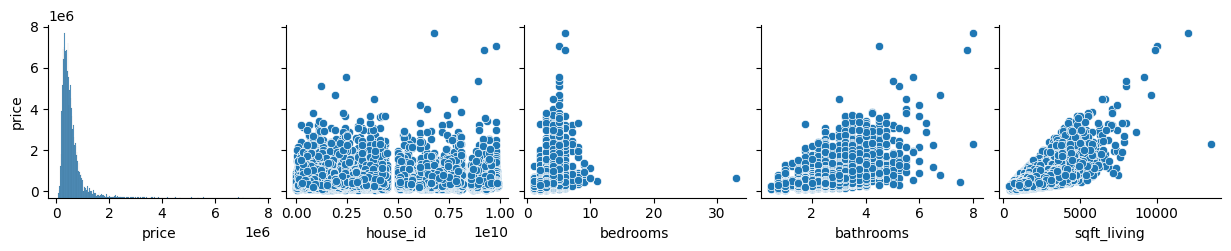

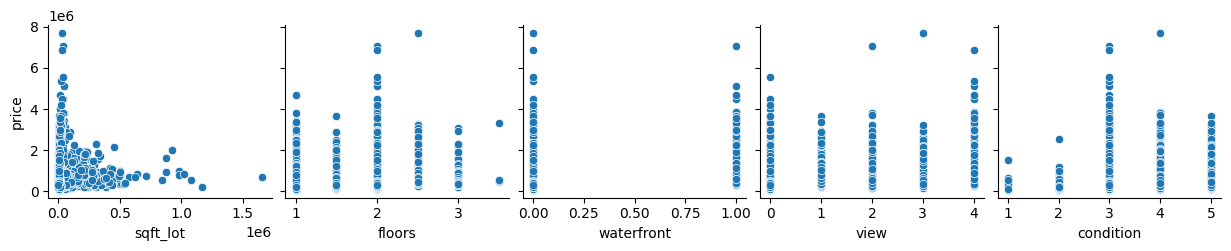

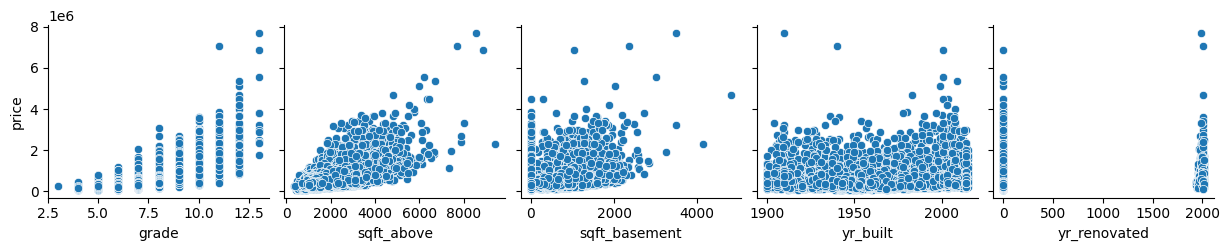

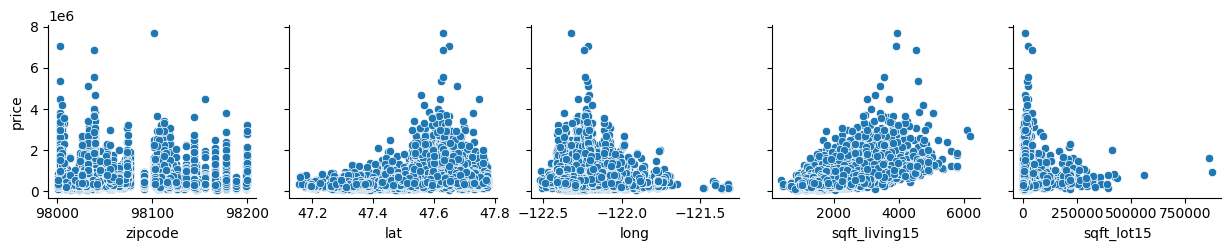

In [155]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price'])

Now the data can be investigated more in detail. Also, feature to feature relationships can be considered.

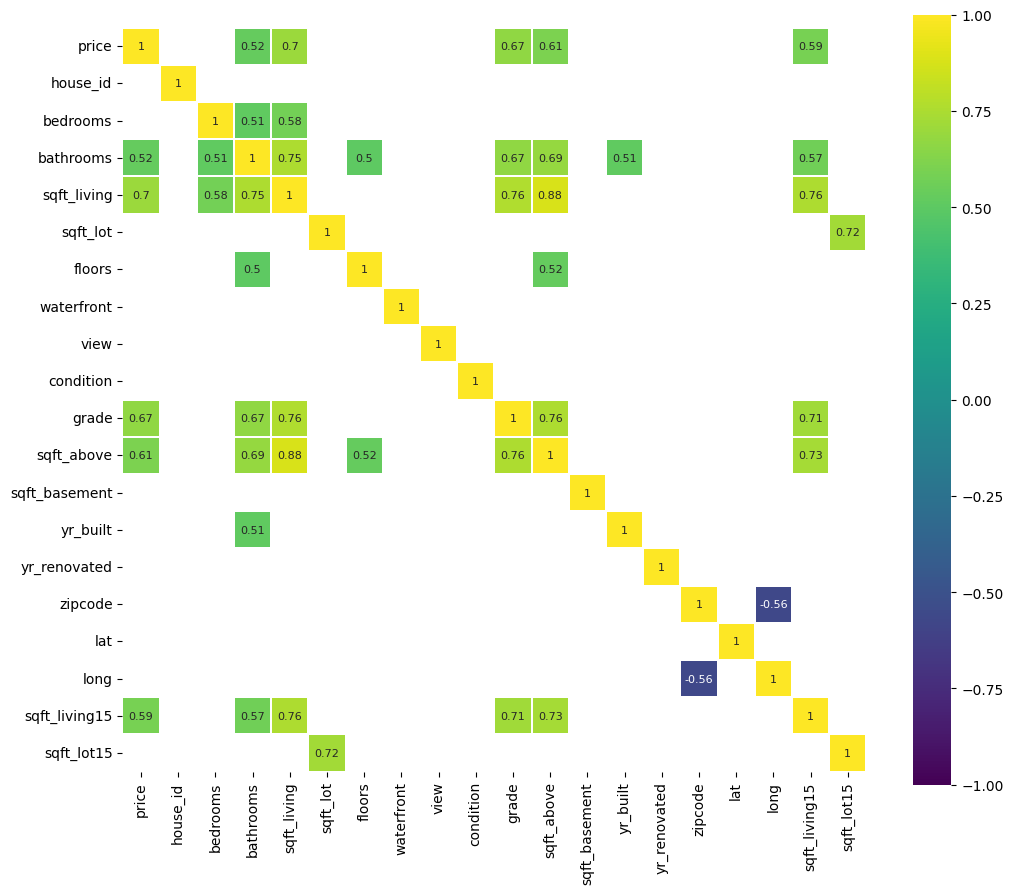

In [158]:
corr = df_num.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Analyse data with different plots eg. histogram, boxplot to get more insights and check hypothesis. 

(0.0, 5000.0)

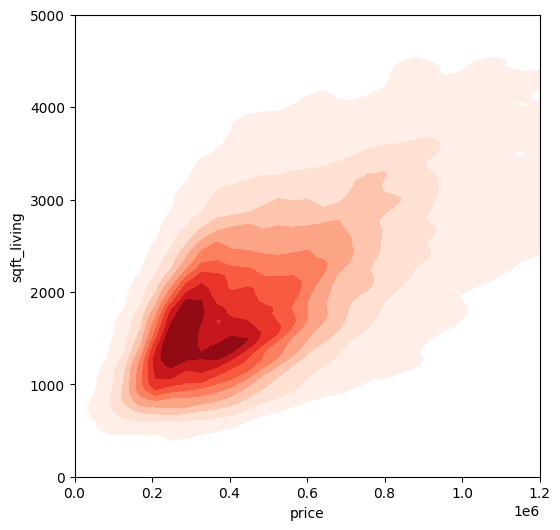

In [161]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=df, x="price", y="sqft_living", cmap="Reds", fill=True, bw_adjust=0.5)
ax.set_xlim([0, 1.2e6])
ax.set_ylim([0, 5000]) 

For example hypothesis: Properties with waterfront have higher prices.

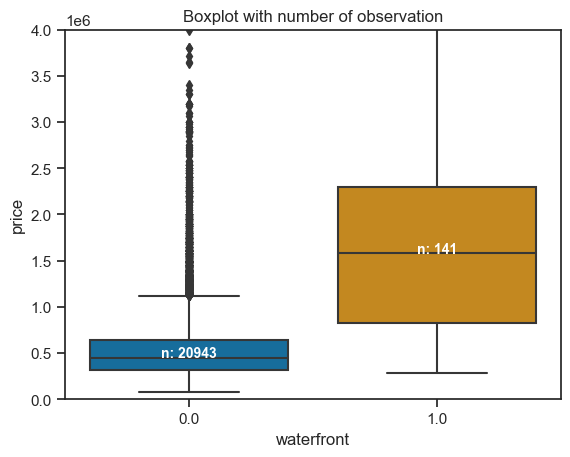

Medians:  [ 450000. 1580000.]
Number of observerstions:  ['n: 20943', 'n: 141']


In [166]:
# Start with a basic boxplot
sns.set_theme(style="ticks", palette="colorblind")
sns.boxplot(x="waterfront", y="price", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['waterfront'])['price'].median().values
nobs = df.groupby("waterfront").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='small', color='white', weight='bold')

# add title
plt.title("Boxplot with number of observation")
plt.axis([-0.5, 1.5, 0, 4e6])

# show the graph
plt.show()
print("Medians: ", medians)
print("Number of observerstions: ", nobs)

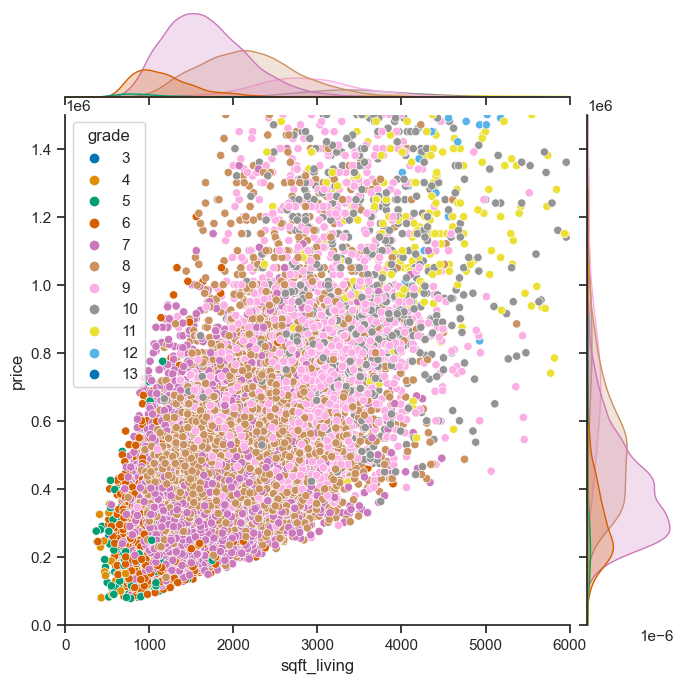

In [171]:
sns.jointplot(data=df, x="sqft_living", y="price", hue="grade", palette="colorblind",
              xlim=(0, 6000), ylim=(0, 1.5e6), height=7)

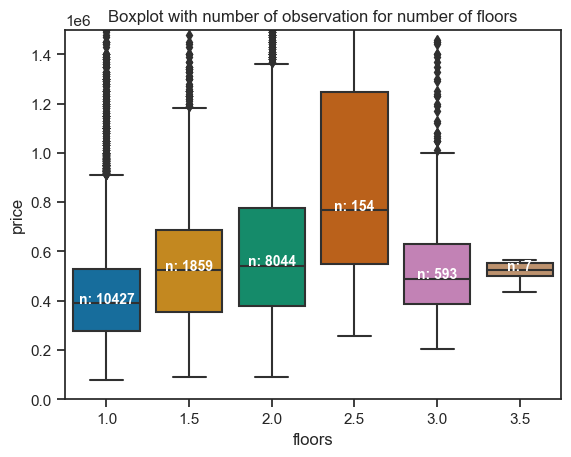

Medians:  [390000.  523000.  542512.5 767500.  490000.  525000. ]
Number of observerstions:  ['n: 10427', 'n: 1859', 'n: 8044', 'n: 154', 'n: 593', 'n: 7']


In [168]:
# Start with a basic boxplot
sns.boxplot(x="floors", y="price", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['floors'])['price'].median().values
nobs = df.groupby("floors").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='small', color='white', weight='bold')

# add title
plt.title("Boxplot with number of observation for number of floors")
plt.axis([-0.5, 5.5, 0, 1.5e6])

# show the graph
plt.show()
print("Medians: ", medians)
print("Number of observerstions: ", nobs)

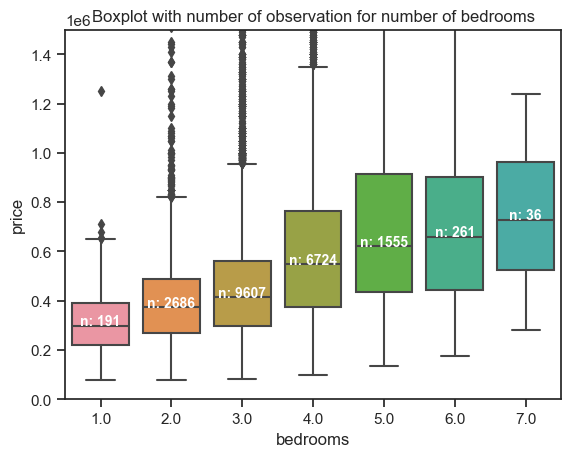

Medians:  [299000. 375000. 413100. 549000. 620000. 660000. 728580. 700000. 817000.
 660000. 520000. 640000.]
Number of observerstions:  ['n: 191', 'n: 2686', 'n: 9607', 'n: 6724', 'n: 1555', 'n: 261', 'n: 36', 'n: 13', 'n: 6', 'n: 3', 'n: 1', 'n: 1']


In [175]:
# Start with a basic boxplot
sns.boxplot(x="bedrooms", y="price", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['bedrooms'])['price'].median().values
nobs = df.groupby("bedrooms").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='small', color='white', weight='bold')

# add title
plt.title("Boxplot with number of observation for number of bedrooms")
plt.axis([-0.5, 6.5, 0, 1.5e6])

# show the graph
plt.show()
print("Medians: ", medians)
print("Number of observerstions: ", nobs)

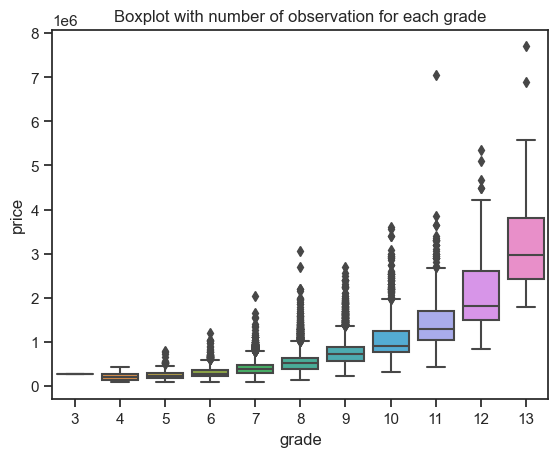

Medians:  [ 262000.  200000.  229950.  276250.  375000.  512250.  721750.  910500.
 1280000. 1820000. 2980000.]
Number of observerstions:  ['n: 1', 'n: 27', 'n: 235', 'n: 1990', 'n: 8765', 'n: 5922', 'n: 2546', 'n: 1108', 'n: 389', 'n: 88', 'n: 13']


In [177]:
# Start with a basic boxplot
sns.boxplot(x="grade", y="price", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['grade'])['price'].median().values
nobs = df.groupby("grade").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
#for tick,label in zip(pos,ax.get_xticklabels()):
#    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='small', color='white', weight='bold')

# add title
plt.title("Boxplot with number of observation for each grade")

# show the graph
plt.show()
print("Medians: ", medians)
print("Number of observerstions: ", nobs)

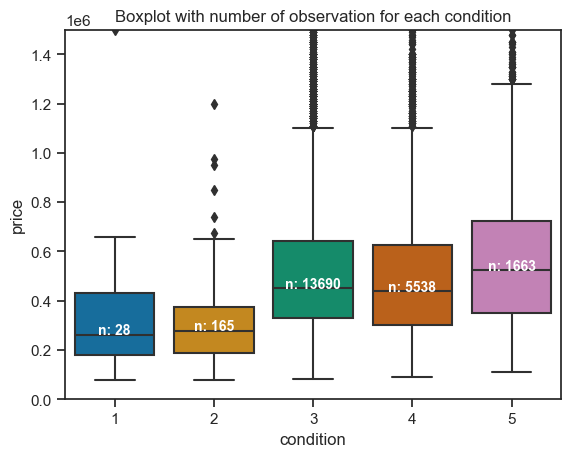

Medians:  [262500.  279000.  450900.  439972.5 525000. ]
Number of observerstions:  ['n: 28', 'n: 165', 'n: 13690', 'n: 5538', 'n: 1663']


In [179]:
# Start with a basic boxplot
sns.boxplot(x="condition", y="price", data=df)
sns.set_theme(style="ticks", palette="colorblind")
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['condition'])['price'].median().values
nobs = df.groupby("condition").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='small', color='white', weight='bold')

# add title
plt.title("Boxplot with number of observation for each condition")
plt.axis([-0.5, 4.5, 0, 1.5e6])

# show the graph
plt.show()
print("Medians: ", medians)
print("Number of observerstions: ", nobs)

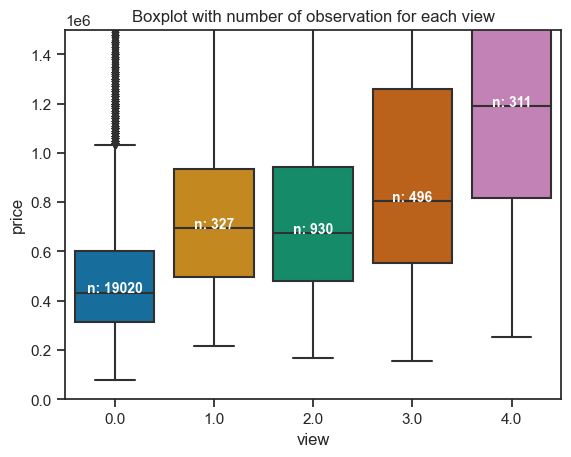

Medians:  [ 432500.  695000.  675000.  805000. 1190000.]
Number of observerstions:  ['n: 19020', 'n: 327', 'n: 930', 'n: 496', 'n: 311']


In [180]:
# Start with a basic boxplot
sns.boxplot(x="view", y="price", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['view'])['price'].median().values
nobs = df.groupby("view").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='small', color='white', weight='bold')

# add title
plt.title("Boxplot with number of observation for each view")
plt.axis([-0.5, 4.5, 0, 1.5e6])

# show the graph
plt.show()
print("Medians: ", medians)
print("Number of observerstions: ", nobs)

Investigation of geographical data:

In [186]:
fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="long", 
                        hover_name="house_id", 
                        hover_data=["house_id", "price"],
                        color="price",
                        color_continuous_scale="rainbow",
                        range_color=[0,450000],
                        size="sqft_living",
                        size_max=10,
                        zoom=9, 
                        height=600,
                        width=700)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# examaniation of cheapest possible buying time during year

In [188]:
df_cheap_time = df.copy()

# Create new column for year
df_cheap_time['year'] = df_cheap_time.date.dt.year

# Create new column for month
df_cheap_time['month'] = df_cheap_time.date.dt.month

# Create monthly median
monthly_median = df_cheap_time.groupby(['year', 'month']).median()

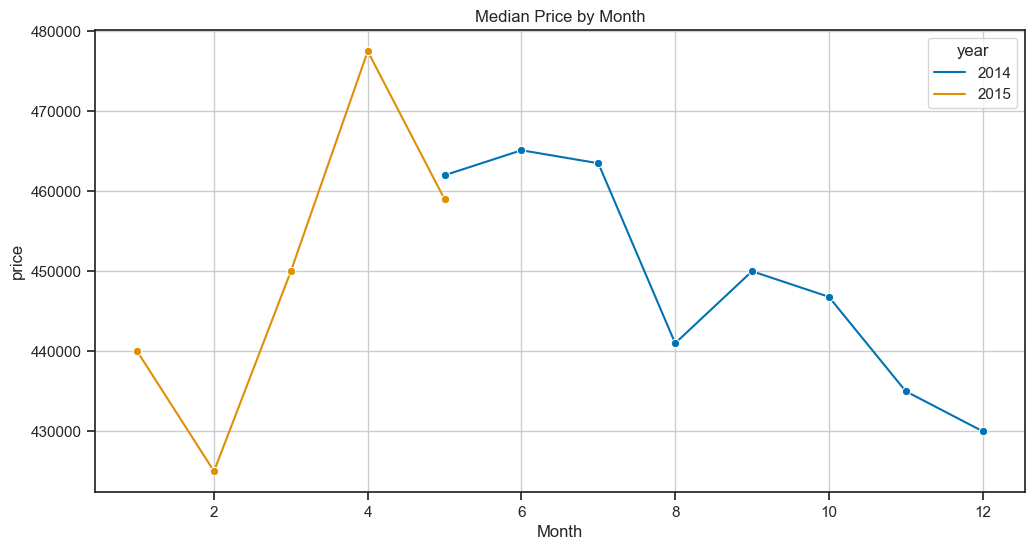

In [189]:
# Function to plot using seaborn
def seaborn_plot_monthly_median(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='month', y=column, hue='year', marker='o', palette="colorblind", errorbar='sd')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'Median {title} by Month')
    plt.grid(True)
    plt.show()
    
seaborn_plot_monthly_median(monthly_median, 'price', 'Price')

Filter dataframe for special needs of customer.

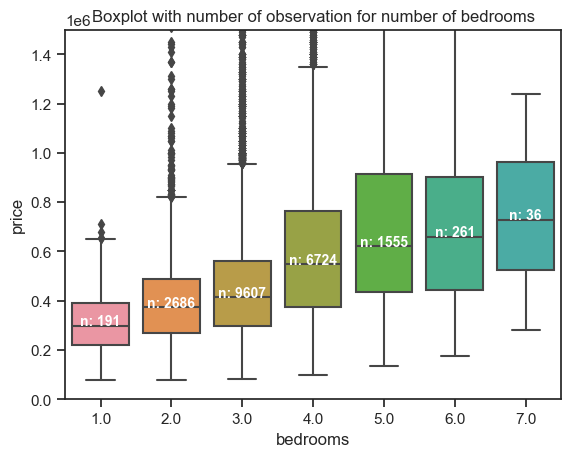

Medians:  [299000. 375000. 413100. 549000. 620000. 660000. 728580. 700000. 817000.
 660000. 520000. 640000.]
Number of observerstions:  ['n: 191', 'n: 2686', 'n: 9607', 'n: 6724', 'n: 1555', 'n: 261', 'n: 36', 'n: 13', 'n: 6', 'n: 3', 'n: 1', 'n: 1']


In [245]:
# Start with a basic boxplot
sns.boxplot(x="bedrooms", y="price", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['bedrooms'])['price'].median().values
nobs = df.groupby("bedrooms").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='small', color='white', weight='bold')

# add title
plt.title("Boxplot with number of observation for number of bedrooms")
plt.axis([-0.5, 6.5, 0, 1.5e6])

# show the graph
plt.show()
print("Medians: ", medians)
print("Number of observerstions: ", nobs)

In [246]:
df.groupby(['bedrooms'])['price'].describe()

count          mean            std       min        25%       50%  \
bedrooms                                                                       
1.0        191.0  3.188897e+05  150349.113104   80000.0  219750.00  299000.0   
2.0       2686.0  4.015553e+05  197004.171064   78000.0  270000.00  375000.0   
3.0       9607.0  4.666677e+05  263683.430514   82000.0  296000.00  413100.0   
4.0       6724.0  6.350755e+05  389176.970984  100000.0  375000.00  549000.0   
5.0       1555.0  7.878901e+05  598716.926846  133000.0  436250.00  620000.0   
6.0        261.0  8.230676e+05  763369.811592  175000.0  442500.00  660000.0   
7.0         36.0  9.668338e+05  757949.446597  280000.0  523000.00  728580.0   
8.0         13.0  1.105077e+06  897495.725295  340000.0  490000.00  700000.0   
9.0          6.0  8.939998e+05  381533.900984  450000.0  624999.25  817000.0   
10.0         3.0  8.200000e+05  285832.118559  650000.0  655000.00  660000.0   
11.0         1.0  5.200000e+05            NaN  520000.0  520000.00  520000.0   
33.0         1.0  6.400000e+05            NaN  640000.0  640000.00  640000.0   

                75%        max  
bedrooms                        
1.0        392500.0  1250000.0  
2.0        490000.0  3280000.0  
3.0        560000.0  3800000.0  
4.0        765000.0  4490000.0  
5.0        915000.0  7060000.0  
6.0        900000.0  7700000.0  
7.0        962250.0  3200000.0  
8.0       1650000.0  3300000.0  
9.0       1193500.0  1400000.0  
10.0       905000.0  1150000.0  
11.0       520000.0   520000.0  
33.0       640000.0   640000.0

In [261]:
filtered_df = df[
    (df['bedrooms'] == 4) &
    (df['price'] >= 100000) & (df['price'] <= 375000) 
]

In [266]:
fig = px.scatter_mapbox(filtered_df, 
                        lat="lat", 
                        lon="long", 
                        hover_name="house_id", 
                        hover_data=["house_id", "price", "bedrooms", "condition", "sqft_living"],
                        color="price",
                        color_continuous_scale="rainbow",
                        size_max=10,
                        zoom=9, 
                        height=300,
                        width=700)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [263]:
# Create the density heatmap
fig = px.density_mapbox(filtered_df, 
                        lat='lat', 
                        lon='long',
                        hover_name="house_id", 
                        hover_data=["price", "bedrooms", "condition"],
                        radius=5,
                        center=dict(lat=filtered_df['lat'].mean(), 
                                    lon=filtered_df['long'].mean()),
                        zoom=9, 
                        color_continuous_scale='plasma',
                        mapbox_style="open-street-map")

# Show the plot
fig.show()

Furthermore, check different relationships with filtered dataframe.

In [267]:
df_cheap_time = filtered_df.copy()

# Create new column for year
df_cheap_time['year'] = df_cheap_time.date.dt.year

# Create new column for month
df_cheap_time['month'] = df_cheap_time.date.dt.month

# Create monthly median
monthly_median = df_cheap_time.groupby(['year', 'month']).median()

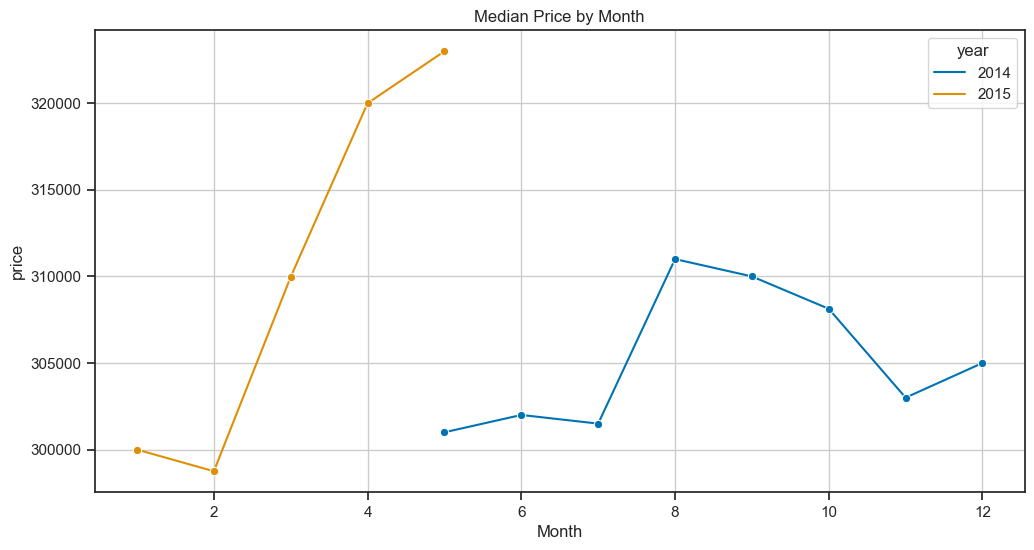

In [268]:
# Function to plot using seaborn
def seaborn_plot_monthly_median(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='month', y=column, hue='year', marker='o', palette="colorblind", errorbar='sd')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'Median {title} by Month')
    plt.grid(True)
    plt.show()
    
seaborn_plot_monthly_median(monthly_median, 'price', 'Price')